In [1]:
import pandas as pd 
import numpy as np
pd.set_option('display.max_columns',None)
from sklearn.feature_extraction.text import CountVectorizer
import jieba # 导入关键字提取库
import pandas as pd  # 导入pandas

In [2]:
def improt_data(lujing,code):
    data = pd.read_csv(lujing,encoding =code)
    return data

def wenzi(data,z,a):
    list_2 = []
    list_3 = []
    lis = []
    
    for row,data_ in data.iterrows():
#         name = data_['商品名称']
#         list_3.append(name)
        y = data_[a]
        tr = y.find(z)
        if tr > -1 :
            list_2.append(y)
    print('关于' + '“' + z + '”' + '的订单数量是：',len(list_2))  
    lis.append(list_2)
    lis.append(list_3)
    return lis

def jiebe(data):    
    text_list = []
    for line in data:
        hou = ",".join(jieba.cut(line))
        strlist = hou.split(',') 
        text_list.append(strlist)
    return text_list

def clean(list_name_,stopwords_):    
    clean_line = []
    for line in list_name_:
        haha = []
        for word in line:
            if word in stopwords_:
                continue
            haha.append(word)
        haha = ','.join(haha)
        clean_line.append(haha)

    return clean_line

def drop_du(data,a):
    df = data.drop_duplicates(subset=a,inplace=False,keep = 'last')
    list_ = list(df[a])
    list_sum = []
    list_sum_ = []
    list__ = []
    dict_ = {}
    for i in range(len(list_)):
        b = list_[i]
        sum_ = data[data[a] == b ]['商户ID'].count()
        if sum_ > 1 :
            list__.append(b)
            dict_[b] = sum_
        else:
            list_sum.append(b)
    k = [list__,dict_,list_sum]
    return k

In [3]:
lujing = r'C:\Users\Administrator\datas\艾尚花语\活动&单门店\七夕\七夕订单.csv'
code = 'gbk'
data = improt_data(lujing,code)

In [4]:
data

,日期,订单编号,下单时间,接单时长,店铺名称,店铺ID,店铺所在城市,订单支付类型,订单状态,订单配送状态,是否预订单,订单总金额,订单折扣后金额,平台承担活动金额,商家承担活动金额,商品分类,商品名称,UPC码,商品SKU码,商品销售数量,商品原价销售额,商品实付销售额,商品总补贴金额,商品商家补贴金额,商品平台补贴金额,是否部分退款商品,部分退款商品数量,部分退款商品金额,订单小额付款,配送费,是否活动订单,优惠活动,是否催单,回复状态,商家回复内容,配送时长,打包袋费,订单完成时间,订单取消原因（仅取消订单）
0,\t20200824-20200826,90242751795091754,2020-08-25 21:50:30\t,172秒,"花韵花艺馆鲜花店(七夕节预定,生日鲜花，表白鲜花)\t",9024275,郑州\t,在线支付,订单已处理,配送中,否,259.0,140.0,0.0,124.0,约惠七夕\t,【未来可期】11枝香槟玫瑰鲜花礼盒-七夕节表白鲜花,NaN,ashy0417\t,1,259.0,140.0,119.0,119.0,0.0,否,0,0.0,0.0,0.0,是,满69.0元赠精美贺卡下单备注贺卡内容*1/购买【未来可期】11枝香槟玫瑰鲜花礼盒-七夕节表...,否,未回复,NaN,0.00分,0.0,NaN,NaN
1,\t20200824-20200826,90242750408368023,2020-08-25 10:55:55\t,166秒,"花韵花艺馆鲜花店(七夕节预定,生日鲜花，表白鲜花)\t",9024275,郑州\t,在线支付,订单完成,配送中,否,299.0,190.0,0.0,114.0,向日葵花语\t,【绝代佳人】3枝向日葵+11枝香槟玫瑰韩式鲜花花束,NaN,as0102\t,1,299.0,190.0,109.0,109.0,0.0,否,0,0.0,0.0,0.0,是,满200.0元减100.0元/满69.0元赠精美贺卡下单备注贺卡内容*1/门店新客立减9.0...,否,未回复,NaN,0.00分,0.0,2020-08-25 15:49:22\t,NaN
2,\t20200824-20200826,90242753470084206,2020-08-25 11:16:26\t,142秒,"花韵花艺馆鲜花店(七夕节预定,生日鲜花，表白鲜花)\t",9024275,郑州\t,在线支付,订单完成,配送中,否,259.0,170.0,0.0,94.0,约惠七夕\t,【青春不悔】19枝香槟玫瑰鲜花花束-七夕节表白鲜花,NaN,ashy0425\t,1,259.0,170.0,89.0,89.0,0.0,否,0,0.0,0.0,0.0,是,满69.0元赠精美贺卡下单备注贺卡内容*1/购买【青春不悔】19枝香槟玫瑰鲜花花束-七夕节表...,否,未回复,NaN,0.00分,0.0,2020-08-25 15:57:17\t,NaN
3,\t20200824-20200826,90242752386186755,2020-08-25 17:56:05\t,167秒,"花韵花艺馆鲜花店(七夕节预定,生日鲜花，表白鲜花)\t",9024275,郑州\t,在线支付,订单完成,用户提交订单,否,329.0,160.0,0.0,174.0,毕业季\t,【盛夏】19枝粉玫瑰鲜花花束毕业季花礼,NaN,as0283\t,1,329.0,160.0,169.0,169.0,0.0,否,0,0.0,0.0,0.0,是,满69.0元赠精美贺卡下单备注贺卡内容*1/购买【盛夏】19枝粉玫瑰鲜花花束毕业季花礼原价3...,否,已回复,NaN,0.00分,0.0,2020-08-25 18:43:35\t,NaN
4,\t20200824-20200826,90242782800320932,2020-08-24 17:22:22\t,54秒,"友新意鲜花坊(七夕节预定,生日鲜花，表白鲜花)\t",9024278,西安\t,在线支付,订单完成,配送中,否,318.0,179.0,0.0,144.0,毕业季\t,【明眸】11枝香槟玫瑰+1枝向日葵鲜花花束毕业季花礼,NaN,as0280\t,1,279.0,143.0,136.0,136.0,0.0,否,0,0.0,0.0,39.0,是,满69.0元赠精美贺卡下单备注贺卡内容*1/购买【明眸】11枝香槟玫瑰+1枝向日葵鲜花花束毕...,否,未回复,NaN,0.00分,0.0,2020-08-24 23:46:31\t,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4523,\t20200824-20200826,98113453470084206,2020-08-25 09:55:35\t,40秒,玫瑰花店\t,9811345,怀化\t,在线支付,订单完成,配送中,否,259.0,126.0,0.0,138.0,约惠七夕\t,【春风十里】11枝红玫瑰鲜花礼盒-七夕节表白鲜花,NaN,ashy0390\t,1,259.0,126.0,133.0,133.0,0.0,否,0,0.0,0.0,0.0,是,满69.0元赠精美贺卡下单备注贺卡内容*1/购买【春风十里】11枝红玫瑰鲜花礼盒-七夕节表白...,否,未回复,NaN,0.00分,0.0,2020-08-25 15:04:32\t,NaN
4524,\t20200824-20200826,98113452386186755,2020-08-25 09:58:17\t,41秒,玫瑰花店\t,9811345,怀化\t,在线支付,订单完成,配送中,否,259.0,126.0,0.0,138.0,约惠七夕\t,【粉色公主】11枝粉玫瑰鲜花礼盒-七夕节表白鲜花,NaN,ashy0394\t,1,259.0,126.0,133.0,133.0,0.0,否,0,0.0,0.0,0.0,是,满69.0元赠精美贺卡下单备注贺卡内容*1/购买【粉色公主】11枝粉玫瑰鲜花礼盒-七夕节表白...,否,未回复,NaN,0.00分,0.0,2020-08-25 15:11:15\t,NaN
4525,\t20200824-20200826,98113451795091754,2020-08-25 17:07:55\t,140秒,玫瑰花店\t,9811345,怀化\t,在线支付,订单完成,用户提交订单,否,259.0,136.0,0.0,128.0,约惠七夕\t,【怦然心动】11枝红玫瑰鲜花网红礼盒-七夕节表白鲜花,NaN,ashy0400\t,1,259.0,136.0,123.0,123.0,0.0,否,0,0.0,0.0,0.0,是,满69.0元赠精美贺卡下单备注贺卡内容*1/购买【怦然心动】11枝红玫瑰鲜花网红礼盒-七夕节...,否,未回复,NaN,0.00分,0.0,2020-08-25 23:37:16\t,NaN
4526,\t20200824-20200826,98113451677285159,2020-08-25 17:19:50\t,140秒,玫瑰花店\t,9811345,怀化\t,在线支付,订单完成,用户提交订单,否,329.0,146.0,0.0,188.0,约惠七夕\t,【如梦】19枝红玫瑰鲜花花束-七夕节表白鲜花,NaN,ashy0403\t,1,329.0,146.0,183.0,183.0,0.0,否,0,0.0,0.0,0.0,是,满69.0元赠精美贺卡下单备注贺卡内容*1/购买【如梦】19枝红玫瑰鲜花花束-七夕节表白鲜花...,否,未回复,NaN,0.00分,0.0,2020-08-25 23:35:01\t,NaN


In [30]:
drop_du(data,'配送费')

[[28.0,
  39.0,
  30.0,
  50.0,
  3.0,
  25.0,
  20.0,
  5.0,
  18.0,
  8.0,
  10.0,
  9.0,
  1.0,
  15.0,
  0.0],
 {28.0: 3,
  39.0: 9,
  30.0: 2,
  50.0: 20,
  3.0: 14,
  25.0: 4,
  20.0: 49,
  5.0: 38,
  18.0: 3,
  8.0: 21,
  10.0: 177,
  9.0: 2,
  1.0: 46,
  15.0: 31,
  0.0: 4107},
 [19.0, 12.0]]

# 数据处理

In [5]:
data['下单时间'] = pd.to_datetime(data['下单时间'],format='%Y-%m-%d %H:%M:%S')

In [6]:
data['下单时间_day'] = data['下单时间'].dt.day
data['下单时间_hour'] = data['下单时间'].dt.hour

In [7]:
data_24 = data[data['下单时间_day'] == 24]
data_25 = data[data['下单时间_day'] == 25]

In [8]:
data_25 = data_25.sort_values(by='下单时间_hour',ascending=True)
data_24 = data_24.sort_values(by='下单时间_hour',ascending=True)

In [9]:
data_25

,日期,订单编号,下单时间,接单时长,店铺名称,店铺ID,店铺所在城市,订单支付类型,订单状态,订单配送状态,是否预订单,订单总金额,订单折扣后金额,平台承担活动金额,商家承担活动金额,商品分类,商品名称,UPC码,商品SKU码,商品销售数量,商品原价销售额,商品实付销售额,商品总补贴金额,商品商家补贴金额,商品平台补贴金额,是否部分退款商品,部分退款商品数量,部分退款商品金额,订单小额付款,配送费,是否活动订单,优惠活动,是否催单,回复状态,商家回复内容,配送时长,打包袋费,订单完成时间,订单取消原因（仅取消订单）,下单时间_day,下单时间_hour
1731,\t20200824-20200826,93660912386186755,2020-08-25 00:25:52,0秒,"海霞花艺鲜花店(七夕节预定,生日鲜花，表白鲜花)\t",9366091,遵义\t,在线支付,订单取消,用户提交订单,否,259.0,116.0,0.0,148.0,爱意表达\t,【爱如初恋】11枝红玫瑰鲜花花束,NaN,as0013\t,1,259.0,116.00,143.00,143.00,0.0,否,0,0.0,0.0,0.0,是,满69.0元赠精美贺卡下单备注贺卡内容*1/购买【爱如初恋】11枝红玫瑰鲜花花束原价259....,否,未回复,NaN,0.00分,0.0,NaN,其他\t,25,0
57,\t20200824-20200826,90242780408368023,2020-08-25 00:50:37,0秒,"友新意鲜花坊(七夕节预定,生日鲜花，表白鲜花)\t",9024278,西安\t,在线支付,订单完成,配送中,是,298.0,162.0,0.0,141.0,约惠七夕\t,【幸福时光】11枝粉玫瑰鲜花花束-七夕节表白鲜花,NaN,as0241\t,1,259.0,126.00,133.00,133.00,0.0,否,0,0.0,0.0,39.0,是,满69.0元赠精美贺卡下单备注贺卡内容*1/购买【幸福时光】11枝粉玫瑰鲜花花束-七夕节表白...,否,未回复,NaN,0.00分,0.0,2020-08-25 16:29:36\t,NaN,25,0
3628,\t20200824-20200826,96700023470084206,2020-08-25 00:52:30,0秒,情艺鲜花礼品鲜花店\t,9670002,株洲\t,在线支付,订单完成,配送中,否,329.0,150.0,0.0,184.0,约惠七夕\t,【巴黎春天】19枝红玫瑰鲜花花束-七夕节表白鲜花,NaN,ashy0423\t,1,329.0,150.00,179.00,179.00,0.0,否,0,0.0,0.0,0.0,是,满69.0元赠精美贺卡下单备注贺卡内容*1/购买【巴黎春天】19枝红玫瑰鲜花花束-七夕节表白...,否,未回复,NaN,0.00分,0.0,2020-08-25 14:34:38\t,NaN,25,0
3627,\t20200824-20200826,96700020408368023,2020-08-25 00:43:15,0秒,情艺鲜花礼品鲜花店\t,9670002,株洲\t,在线支付,订单完成,配送中,否,259.0,117.0,0.0,147.0,约惠七夕\t,【春风十里】11枝红玫瑰鲜花礼盒-七夕节表白鲜花,NaN,ashy0390\t,1,259.0,117.00,142.00,142.00,0.0,否,0,0.0,0.0,0.0,是,满69.0元赠精美贺卡下单备注贺卡内容*1/购买【春风十里】11枝红玫瑰鲜花礼盒-七夕节表白...,否,未回复,NaN,0.00分,0.0,2020-08-25 22:56:45\t,NaN,25,0
2779,\t20200824-20200826,94826320408368023,2020-08-25 00:55:18,0秒,"幸福花园鲜花店(七夕节预定,生日鲜花，表白鲜花)\t",9482632,郴州\t,在线支付,订单完成,配送中,是,509.0,229.0,0.0,285.0,爱情告白\t,【缘定三生】33枝红玫瑰黑纱鲜花花束,NaN,as0253\t,1,509.0,229.00,280.00,280.00,0.0,否,0,0.0,0.0,0.0,是,满69.0元赠精美贺卡下单备注贺卡内容*1/购买【缘定三生】33枝红玫瑰黑纱鲜花花束原价50...,否,未回复,NaN,0.00分,0.0,2020-08-25 13:59:09\t,NaN,25,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,\t20200824-20200826,90439962742513103,2020-08-25 22:51:18,0秒,"花间时光(七夕节预定,生日鲜花，表白鲜花)\t",9043996,许昌\t,在线支付,订单已处理,配送中,是,498.0,265.0,0.0,238.0,约惠七夕\t,【四块五的妞】11枝红玫瑰鲜花礼盒-七夕节表白鲜花,NaN,ashy0405\t,1,259.0,137.45,121.55,121.55,0.0,否,0,0.0,0.0,0.0,是,满69.0元赠精美贺卡下单备注贺卡内容*1/购买【四块五的妞】11枝红玫瑰鲜花礼盒-七夕节表...,否,未回复,NaN,0.00分,0.0,NaN,NaN,25,22
3894,\t20200824-20200826,96857503774986605,2020-08-25 22:02:37,11秒,"花语花卉鲜花店(七夕节预定,生日鲜花，表白鲜花)\t",9685750,襄阳\t,在线支付,订单已处理,配送中,否,259.0,120.0,0.0,144.0,约惠七夕\t,【幸福时光】11枝粉玫瑰鲜花花束-七夕节表白鲜花,NaN,as0241\t,1,259.0,120.00,139.00,139.00,0.0,否,0,0.0,0.0,0.0,是,满69.0元赠精美贺卡下单备注贺卡内容*1/购买【幸福时光】11枝粉玫瑰鲜花花束-七夕节表白...,否,未回复,NaN,0.00分,0.0,NaN,NaN,25,22
3428,\t20200824-20200826,96083142274562704,2020-08-25 23:04:07,0秒,"花王花艺鲜花店(七夕节预定,生日鲜花，表白鲜花)\t",9608314,武威\t,在线支付,订单取消,用户提交订单,否,329.0,206.0,0.0,128.0,约惠七夕\t,【独宠伊人】19枝红玫瑰鲜花礼盒-七夕节表白鲜花,NaN,as0037\t,1,329.0,206.00,123.00,123.00,0.0,否,0,0.0,0.0,0.0,是,满69.0元赠精美贺卡下单备注贺卡内容*1/购买【独宠伊人】19枝红玫瑰鲜花礼盒-七夕节表白...,否,未回复,NaN,0.00分,0.0,NaN,其他\t,25,23
3427,\t20200824-20200826,96083142665365337,2020-08-25 23:01:59,0秒,"花王花艺鲜花店(七夕节预定,生日鲜花，表白鲜花)\t",9608314,武威\t,在线支付,订单取消,用户提交订单,否,339.0,203.0,0.0,141.0,爱意表达\t,【相知相随】19枝红玫瑰鲜花花束,NaN,as0029\t,1,329.0,196.00,133.00,133.00,0.0,否,0,0.0,0.0,10.0,是,满69.0元赠精美贺卡下单备注贺卡内容*1/购买【相知相随】19枝红玫瑰鲜花花束原价329....,否,未回复,NaN,0.00分,0.0,NaN,其他\t,25,23


In [10]:
data_24

,日期,订单编号,下单时间,接单时长,店铺名称,店铺ID,店铺所在城市,订单支付类型,订单状态,订单配送状态,是否预订单,订单总金额,订单折扣后金额,平台承担活动金额,商家承担活动金额,商品分类,商品名称,UPC码,商品SKU码,商品销售数量,商品原价销售额,商品实付销售额,商品总补贴金额,商品商家补贴金额,商品平台补贴金额,是否部分退款商品,部分退款商品数量,部分退款商品金额,订单小额付款,配送费,是否活动订单,优惠活动,是否催单,回复状态,商家回复内容,配送时长,打包袋费,订单完成时间,订单取消原因（仅取消订单）,下单时间_day,下单时间_hour
1710,\t20200824-20200826,93660911269807160,2020-08-24 00:19:08,0秒,"海霞花艺鲜花店(七夕节预定,生日鲜花，表白鲜花)\t",9366091,遵义\t,在线支付,订单完成,用户提交订单,是,399.0,296.00,0.0,108.00,漫天星辰\t,【情比金坚】粉色满天星鲜花抱抱桶,NaN,as0094\t,1,399.0,296.0,103.0,103.0,0.0,否,0,0.0,0.0,0.0,是,满200.0元减100.0元/满69.0元赠精美贺卡下单备注贺卡内容*1/门店新客立减3.0...,否,未回复,NaN,0.00分,0.0,2020-08-25 14:40:23\t,NaN,24,0
390,\t20200824-20200826,91279951269807160,2020-08-24 01:05:07,0秒,"柔怡鲜花鲜花店(七夕节预定,生日鲜花，表白鲜花)\t",9127995,烟台\t,在线支付,订单取消,用户提交订单,是,259.0,107.00,0.0,157.00,约惠七夕\t,【幸福时光】11枝粉玫瑰鲜花花束-七夕节表白鲜花,NaN,as0241\t,1,259.0,107.0,152.0,152.0,0.0,否,0,0.0,0.0,0.0,是,满69.0元赠精美贺卡下单备注贺卡内容*1/购买【幸福时光】11枝粉玫瑰鲜花花束-七夕节表白...,否,未回复,NaN,0.00分,0.0,NaN,其他\t,24,1
391,\t20200824-20200826,91279953049752078,2020-08-24 01:08:22,0秒,"柔怡鲜花鲜花店(七夕节预定,生日鲜花，表白鲜花)\t",9127995,烟台\t,在线支付,订单完成,用户提交订单,是,259.0,107.00,0.0,157.00,约惠七夕\t,【幸福时光】11枝粉玫瑰鲜花花束-七夕节表白鲜花,NaN,as0241\t,1,259.0,107.0,152.0,152.0,0.0,否,0,0.0,0.0,0.0,是,满69.0元赠精美贺卡下单备注贺卡内容*1/购买【幸福时光】11枝粉玫瑰鲜花花束-七夕节表白...,否,未回复,NaN,0.00分,0.0,2020-08-25 12:35:15\t,NaN,24,1
2068,\t20200824-20200826,94156111269807160,2020-08-24 01:25:44,0秒,"圣格花艺鲜花店(七夕节预定,生日鲜花，表白鲜花)\t",9415611,佳木斯\t,在线支付,订单取消,用户提交订单,是,329.0,137.00,0.0,197.00,约惠七夕\t,【如梦】19枝红玫瑰鲜花花束-七夕节表白鲜花,NaN,ashy0403\t,1,329.0,137.0,192.0,192.0,0.0,否,0,0.0,0.0,0.0,是,满69.0元赠精美贺卡下单备注贺卡内容*1/购买【如梦】19枝红玫瑰鲜花花束-七夕节表白鲜花...,否,未回复,NaN,0.00分,0.0,NaN,其他\t,24,1
717,\t20200824-20200826,92663361269807160,2020-08-24 01:06:15,0秒,"珍馨花店鲜花店(七夕节预定,生日鲜花，表白鲜花)\t",9266336,泉州\t,在线支付,订单已处理,配送中,是,259.0,116.00,0.0,148.00,爱意表达\t,【爱如初恋】11枝红玫瑰鲜花花束,NaN,as0013\t,1,259.0,116.0,143.0,143.0,0.0,否,0,0.0,0.0,0.0,是,满69.0元赠精美贺卡下单备注贺卡内容*1/购买【爱如初恋】11枝红玫瑰鲜花花束原价259....,否,未回复,NaN,0.00分,0.0,NaN,NaN,24,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534,\t20200824-20200826,92238720915830123,2020-08-24 23:23:32,1秒,"天天花坊鲜花店(七夕节预定,生日鲜花，表白鲜花)\t",9223872,郴州\t,在线支付,订单取消,用户提交订单,否,259.0,129.00,0.0,135.00,约惠七夕\t,【粉色公主】11枝粉玫瑰鲜花礼盒-七夕节表白鲜花,NaN,ashy0394\t,1,259.0,129.0,130.0,130.0,0.0,否,0,0.0,0.0,0.0,是,满69.0元赠精美贺卡下单备注贺卡内容*1/购买【粉色公主】11枝粉玫瑰鲜花礼盒-七夕节表白...,否,未回复,NaN,0.00分,0.0,NaN,其他\t,24,23
302,\t20200824-20200826,90439952024161140,2020-08-24 23:55:51,0秒,"情缘婚庆鲜花店(七夕节预定,生日鲜花，表白鲜花)\t",9043995,南平\t,在线支付,订单完成,用户提交订单,是,259.0,126.00,0.0,138.00,约惠七夕\t,【春风十里】11枝红玫瑰鲜花礼盒-七夕节表白鲜花,NaN,ashy0390\t,1,259.0,126.0,133.0,133.0,0.0,否,0,0.0,0.0,0.0,是,满69.0元赠精美贺卡下单备注贺卡内容*1/购买【春风十里】11枝红玫瑰鲜花礼盒-七夕节表白...,否,未回复,NaN,0.00分,0.0,2020-08-25 15:01:32\t,NaN,24,23
1205,\t20200824-20200826,93146071269807160,2020-08-24 23:19:27,0秒,"如意花艺鲜花店(七夕节预定,生日鲜花，表白鲜花)\t",9314607,南阳\t,在线支付,订单完成,配送中,是,259.0,100.00,0.0,164.00,约惠七夕\t,【春风十里】11枝红玫瑰鲜花礼盒-七夕节表白鲜花,NaN,ashy0390\t,1,259.0,100.0,159.0,159.0,0.0,否,0,0.0,0.0,0.0,是,满69.0元赠精美贺卡下单备注贺卡内容*1/购买【春风十里】11枝红玫瑰鲜花礼盒-七夕节表白...,否,未回复,NaN,0.00分,0.0,2020-08-25 15:23:56\t,NaN,24,23
2488,\t20200824-20200826,94381390915830123,2020-08-24 23:23:10,0秒,"繁花花坊鲜花店(七夕节预定,生日鲜花，表白鲜花)\t",9438139,张家口\t,在线支付,订单完成,配送中,是,279.0,133.01,0.0,150.99,约惠七夕\t,【幸福时光】11枝粉玫瑰鲜花花束-七夕节表白鲜花,NaN,as0241\t,1,259.0,133.0,126.0,126.0,0.0,否,0,0.0,0.0,0.0,是,满69.0元赠精美贺卡下单备注贺卡内容*1/购买【幸福时光】11枝粉玫瑰鲜花花束-七夕节表白...,否,已回复,NaN,0.00分,0.0,2020-08-25 14:34:59\t,NaN,24,23


# 24号时段客单价

In [11]:
data_24.describe()

,订单编号,店铺ID,订单总金额,订单折扣后金额,平台承担活动金额,商家承担活动金额,UPC码,商品销售数量,商品原价销售额,商品实付销售额,商品总补贴金额,商品商家补贴金额,商品平台补贴金额,部分退款商品数量,部分退款商品金额,订单小额付款,配送费,打包袋费,下单时间_day,下单时间_hour
count,9.280000e+02,9.280000e+02,928.000000,928.000000,928.000000,928.000000,0.0,928.000000,928.000000,928.000000,928.000000,928.000000,928.000000,928.0,928.0,928.0,928.000000,928.0,928.0,928.000000
mean,9.427194e+16,9.427194e+06,323.910560,167.541509,0.420259,160.674009,NaN,1.003233,289.614224,149.679170,139.935054,139.523416,0.411638,0.0,0.0,0.0,1.408405,0.0,24.0,16.866379
std,2.090341e+15,2.090341e+05,158.826106,97.504379,1.668963,80.675960,NaN,0.056796,164.269098,98.894095,81.869204,81.792251,1.650326,0.0,0.0,0.0,5.948014,0.0,0.0,4.788226
min,9.024278e+16,9.024278e+06,20.000000,0.010000,0.000000,0.000000,NaN,1.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,24.0,0.000000
25%,9.288258e+16,9.288258e+06,259.000000,120.000000,0.000000,128.000000,NaN,1.000000,259.000000,120.000000,109.000000,109.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,24.0,14.000000
50%,9.415615e+16,9.415615e+06,269.000000,141.500000,0.000000,144.000000,NaN,1.000000,259.000000,136.000000,136.000000,135.170000,0.000000,0.0,0.0,0.0,0.000000,0.0,24.0,17.000000
75%,9.597451e+16,9.597450e+06,329.000000,176.257500,0.000000,173.990000,NaN,1.000000,329.000000,166.000000,152.000000,152.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,24.0,21.000000
max,9.811345e+16,9.811345e+06,2648.000000,1645.000000,10.000000,1008.000000,NaN,2.000000,2598.000000,1595.000000,1003.000000,1003.000000,10.000000,0.0,0.0,0.0,50.000000,0.0,24.0,23.000000


In [12]:

data_24_hour = data_24.drop_duplicates(subset='下单时间_hour',inplace=False)
data_24_hour = list(data_24_hour['下单时间_hour'])
dict_1 = {}
dict_2 = {}
for i in data_24_hour:
    a = data_24[data_24['下单时间_hour'] == i]
    a = a[a['商品实付销售额'] > 10]
    b = a['商品实付销售额'].mean()
    c = a['商品实付销售额'].std()
    dict_1[i] = b
    dict_2[i] = c
    

In [13]:
dict_1

{0: 296.0,
 1: 116.75,
 2: 237.0,
 3: 308.0,
 5: 195.0,
 6: 140.57142857142858,
 7: 125.5,
 8: 151.41176470588235,
 9: 171.52454545454546,
 10: 148.09677419354838,
 11: 169.53325,
 12: 146.21975609756097,
 13: 154.6671794871795,
 14: 150.75022727272727,
 15: 161.24771929824564,
 16: 179.24321428571426,
 17: 155.6157627118644,
 18: 179.5356862745098,
 19: 156.26128571428572,
 20: 158.9690196078431,
 21: 150.21743589743588,
 22: 186.7122093023256,
 23: 156.27741176470587}

In [14]:
dict_2

{0: nan,
 1: 14.150971698084906,
 2: 68.28616258071617,
 3: 90.0166651237425,
 5: 76.07890640644094,
 6: 37.08933873256637,
 7: 11.34460224071342,
 8: 42.65861405321529,
 9: 92.07525864500982,
 10: 44.070666615266646,
 11: 107.92903512262119,
 12: 40.244968659933434,
 13: 52.077609743268745,
 14: 50.18805915098227,
 15: 84.23044648076117,
 16: 117.71922565011351,
 17: 47.80175264437234,
 18: 121.3308578763853,
 19: 88.30003615672814,
 20: 93.81486872036652,
 21: 41.80501804328919,
 22: 167.335726324277,
 23: 76.27023800360172}

# 25号时段客单价

In [15]:
data_25.describe()

,订单编号,店铺ID,订单总金额,订单折扣后金额,平台承担活动金额,商家承担活动金额,UPC码,商品销售数量,商品原价销售额,商品实付销售额,商品总补贴金额,商品商家补贴金额,商品平台补贴金额,部分退款商品数量,部分退款商品金额,订单小额付款,配送费,打包袋费,下单时间_day,下单时间_hour
count,3.600000e+03,3.600000e+03,3600.000000,3600.000000,3600.000000,3600.000000,0.0,3600.000000,3600.000000,3600.000000,3600.000000,3600.000000,3600.000000,3600.000000,3600.000000,3600.0,3600.000000,3600.0,3600.0,3600.000000
mean,9.442825e+16,9.442825e+06,313.180508,178.719614,0.355833,138.991172,NaN,1.003889,291.860225,166.809192,125.051033,124.716867,0.334167,0.000278,0.001644,0.0,1.125556,0.0,25.0,12.468889
std,2.004815e+15,2.004815e+05,121.646009,73.429556,1.483931,72.873417,NaN,0.088118,132.797303,80.138690,74.213390,74.160400,1.437832,0.016667,0.098667,0.0,4.700631,0.0,0.0,4.307973
min,9.024275e+16,9.024275e+06,20.000000,2.990000,0.000000,0.000000,NaN,1.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,25.0,0.000000
25%,9.314606e+16,9.314606e+06,259.000000,140.000000,0.000000,108.000000,NaN,1.000000,259.000000,139.000000,100.000000,100.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,25.0,9.000000
50%,9.427398e+16,9.427398e+06,259.000000,158.000000,0.000000,124.000000,NaN,1.000000,259.000000,156.000000,119.000000,119.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,25.0,12.000000
75%,9.608314e+16,9.608314e+06,329.000000,190.000000,0.000000,155.000000,NaN,1.000000,329.000000,180.000000,140.000000,139.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,25.0,16.000000
max,9.811345e+16,9.811345e+06,1319.000000,1003.000000,14.000000,948.000000,NaN,5.000000,1299.000000,996.000000,948.000000,948.000000,14.000000,1.000000,5.920000,0.0,50.000000,0.0,25.0,23.000000


In [16]:
data_25_hour = data_25.drop_duplicates(subset='下单时间_hour',inplace=False)
data_25_hour = list(data_25_hour['下单时间_hour'])
dict_3 = {}
dict_4 = {}
for i in data_25_hour:
    a = data_25[data_25['下单时间_hour'] == i]
    a = a[a['商品实付销售额'] > 10]
    b = a['商品实付销售额'].mean()
    c = a['商品实付销售额'].std()
    dict_3[i] = b
    dict_4[i] = c

In [27]:
dict_4

{0: 72.8081361513969,
 1: 56.569387377231635,
 2: 53.24650248863983,
 3: 77.18658711699352,
 4: 25.01199712138157,
 5: 59.88417391693974,
 6: 43.81192185250786,
 7: 60.0972969957001,
 8: 80.72397038039138,
 9: 61.27553816530844,
 10: 51.72171248540445,
 11: 88.41152829314788,
 12: 61.15745573581718,
 13: 78.31518204199824,
 14: 76.75257261542151,
 15: 85.19833674073324,
 16: 60.16054831427393,
 17: 89.08920325455612,
 18: 68.77739760936988,
 19: 65.05583188606582,
 20: 65.2755036800796,
 21: 110.48507677554198,
 22: 81.70760961441987,
 23: 22.50185177565023}

In [18]:
d1 = pd.DataFrame(pd.Series(dict_1), columns=['均单价'])
d1 = d1.reset_index().rename(columns={'index':'time'})
d2 = pd.DataFrame(pd.Series(dict_3), columns=['均单价'])
d2 = d2.reset_index().rename(columns={'index':'time'})
import matplotlib.pyplot as plt

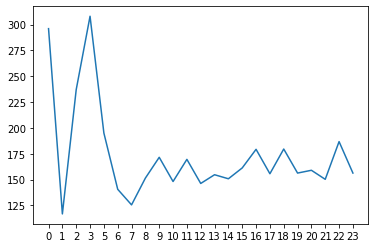

In [19]:
d1['time'] = d1['time'].apply(str)
plt.plot(d1['time'],d1['均单价'])

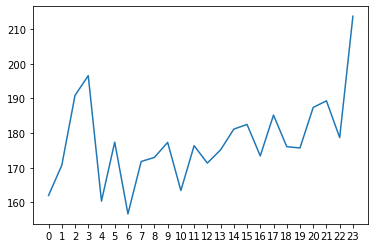

In [20]:
d2['time'] = d2['time'].apply(str)
plt.plot(d2['time'],d2['均单价'])

In [21]:
def drop_du(data,a):
    df = data.drop_duplicates(subset=a,inplace=False,keep = 'last')
    list_ = list(df[a])
    list_sum = []
    list_sum_ = []
    list__ = []
    dict_ = {}
    for i in range(len(list_)):
        b = list_[i]
        sum_ = data[data[a] == b ]['订单编号'].count()
        if sum_ > 1 :
            list__.append(b)
            dict_[b] = sum_
        else:
            list_sum.append(b)
    k = [list__,dict_,list_sum]
    return k

In [28]:
a = drop_du(data,'商品分类')


In [26]:

order=sorted(a[1].items(),key=lambda x:x[1],reverse=True)
order

[('约惠七夕\t', 2810),
 ('爱意表达\t', 649),
 ('购买须知\t', 274),
 ('爱情告白\t', 252),
 ('毕业季\t', 125),
 ('七夕表白19枝\t', 88),
 ('七夕表白11枝\t', 82),
 ('爱的惊喜\t', 55),
 ('七夕表白33枝\t', 40),
 ('向日葵花语\t', 23),
 ('漫天星辰\t', 22),
 ('送长辈\t', 16),
 ('七夕玫瑰鲜花花束\t', 11),
 ('致童年拾童趣\t', 9),
 ('艾尚推荐\t', 8),
 ('康乃馨专区\t', 6),
 ('韩式花束\t', 6),
 ('气球布置派对配件\t', 6),
 ('七夕玫瑰礼盒||七夕玫瑰鲜花花束\t', 5),
 ('向日葵花束\t', 4),
 ('满天星勿忘花束\t', 4),
 ('七夕表白99枝\t', 3),
 ('零食水果其它区\t', 3),
 ('七夕玫瑰礼盒\t', 3),
 ('七夕表白52枝\t', 2),
 ('满天星勿忘花束||七夕玫瑰礼盒\t', 2),
 ('七夕蓝色妖姬\t', 2),
 ('气球布置派对配件||高端鲜花礼盒\t', 2),
 ('七夕玫瑰礼盒||高端鲜花礼盒\t', 2),
 ('百合花束区||七夕玫瑰鲜花花束\t', 2),
 ('后备箱惊喜\t', 2)]

In [23]:
b = wenzi(data,'礼盒','商品名称')

关于“礼盒”的订单数量是： 2041


In [24]:
b =wenzi(data,'11','商品名称')

关于“11”的订单数量是： 2767


In [69]:
b =wenzi(data,'19','商品名称')

关于“19”的订单数量是： 800


In [70]:
b =wenzi(data,'36','商品名称')

关于“36”的订单数量是： 19


In [71]:
b =wenzi(data,'粉玫瑰','商品名称')

关于“粉玫瑰”的订单数量是： 987


In [72]:
b =wenzi(data,'红玫瑰','商品名称')

关于“红玫瑰”的订单数量是： 2694


In [73]:
b =wenzi(data,'花束','商品名称')

关于“花束”的订单数量是： 2120
